In [1]:
from multi_imbalance.datasets import load_datasets
import experiment_autoencoder_basic_weights_mean_dist as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'new_led7digit'
test_on_all_folds = True
test_all_ds = False

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy2(datasets)

In [6]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
                               'units_2nd_layer': 256,
                               'units_3rd_layer': 128,
                               'units_latent_layer': 8},
                 'weighted_triplet_loss': True,
                 'lr': 0.001,
                 'batch_size': 32,
                 'gamma': 0.99,
                 'epochs': 10}


config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
                                       'units_2nd_layer': 128,
                                       'units_3rd_layer': 64,
                                       'units_latent_layer': 48},
                         'weighted_triplet_loss': True,
                         'lr': 0.0010,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 45}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
                                      'units_2nd_layer': 128,
                                      'units_3rd_layer': 64,
                                      'units_latent_layer': 12},
                        'weighted_triplet_loss': True,
                        'lr': 0.007,
                        'batch_size': 16,
                        'gamma': 0.99,
                        'epochs': 20}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
                                       'units_2nd_layer': 256,
                                       'units_3rd_layer': 128,
                                       'units_latent_layer': 16},
                         'weighted_triplet_loss': True,
                         'lr': 0.001,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 45}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
                                     'units_2nd_layer': 300,
                                     'units_3rd_layer': 200,
                                     'units_latent_layer': 12},
                       'weighted_triplet_loss': True,
                       'lr': 0.0008,
                       'batch_size': 16,
                       'gamma': 0.99,
                       'epochs': 3}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
                                         'units_2nd_layer': 64,
                                         'units_3rd_layer': 32,
                                         'units_latent_layer': 16},
                           'weighted_triplet_loss': True,
                           'lr': 0.007,
                           'batch_size': 16,
                           'gamma': 0.99,
                           'epochs': 50}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
                                     'units_2nd_layer': 256,
                                     'units_3rd_layer': 128,
                                     'units_latent_layer': 24},
                       'weighted_triplet_loss': True,
                       'lr': 0.001,
                       'batch_size': 16,
                       'gamma': 0.99,
                       'epochs': 10}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
                                        'units_2nd_layer': 256,
                                        'units_3rd_layer': 128,
                                        'units_latent_layer': 24},
                          'weighted_triplet_loss': True,
                          'lr': 0.003,
                          'batch_size': 32,
                          'gamma': 0.99,
                          'epochs': 10}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
                                 'units_2nd_layer': 256,
                                 'units_3rd_layer': 128,
                                 'units_latent_layer': 14},
                   'weighted_triplet_loss': True,
                   'lr': 0.001,
                   'batch_size': 16,
                   'gamma': 0.99,
                   'epochs': 50}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
                                              'units_2nd_layer': 32,
                                              'units_3rd_layer': 16,
                                              'units_latent_layer': 8},
                                'weighted_triplet_loss': True,
                                'lr': 0.001,
                                'batch_size': 32,
                                'gamma': 0.99,
                                'epochs': 20}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
                                     'units_2nd_layer': 128,
                                     'units_3rd_layer': 64,
                                     'units_latent_layer': 8},
                       'weighted_triplet_loss': True,
                       'lr': 0.001,
                       'batch_size': 16,
                       'gamma': 0.99,
                       'epochs': 20}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
                                         'units_2nd_layer': 64,
                                         'units_3rd_layer': 32,
                                         'units_latent_layer': 8},
                           'weighted_triplet_loss': True,
                           'lr': 0.0015,
                           'batch_size': 32,
                           'gamma': 0.99,
                           'epochs': 15}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
                                               'units_2nd_layer': 64,
                                               'units_3rd_layer': 32,
                                               'units_latent_layer': 12},
                                 'weighted_triplet_loss': True,
                                 'lr': 0.0001,
                                 'batch_size': 32,
                                 'gamma': 0.99,
                                 'epochs': 25}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
                                                  'units_2nd_layer': 64,
                                                  'units_3rd_layer': 16,
                                                  'units_latent_layer': 8},
                                    'weighted_triplet_loss': True,
                                    'lr': 0.003,
                                    'batch_size': 16,
                                    'gamma': 0.99,
                                    'epochs': 25}

config['3mocniej-cut'] = {'nn_config': {'units_1st_layer': 2,
                                        'units_2nd_layer': 128,
                                        'units_3rd_layer': 16,
                                        'units_latent_layer': 8},
                          'weighted_triplet_loss': True,
                          'lr': 0.003,
                          'batch_size': 32,
                          'gamma': 0.99,
                          'epochs': 25}


config['1czysty-cut'] = {'nn_config': {'units_1st_layer': 2,
                                       'units_2nd_layer': 64,
                                       'units_3rd_layer': 32,
                                       'units_latent_layer': 8},
                         'weighted_triplet_loss': True,
                         'lr': 0.004,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 10}

config['2delikatne-cut'] = {'nn_config': {'units_1st_layer': 2,
                                          'units_2nd_layer': 64,
                                          'units_3rd_layer': 32,
                                          'units_latent_layer': 8},
                            'weighted_triplet_loss': True,
                            'lr': 0.004,
                            'batch_size': 32,
                            'gamma': 0.99,
                            'epochs': 30}

In [7]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.004,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 10},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.004,
  'batch_size': 32,
  'gamma': 0.99,
  'epochs': 30},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 16,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 32,
  'gamma': 0.99,
  'epochs': 25},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 16,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 25},
 'balance-scale': {'nn_config': {'units_

In [8]:
autoencoder_config = ex.autoenc_config_calc_strategy1(datasets)

In [9]:
autoencoder_config['balance-scale']

{'epochs': 25,
 'batch_size': 16,
 'test_batch_size': 16,
 'lr': 0.001,
 'gamma': 1}

In [10]:
autoencoder_config['hayes-roth'] = {
    "epochs": 50,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}


autoencoder_config['dermatology'] = {
    'epochs': 70,
    'batch_size': 16,
    'test_batch_size': 16,
    'lr': 0.002,
    'gamma': 1
}

autoencoder_config['balance-scale'] = {
    'epochs': 30,
    'batch_size': 16,
    'test_batch_size': 16,
    'lr': 0.002,
    'gamma': 1
}

autoencoder_config['2delikatne-cut'] = {
    "epochs": 5,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}

autoencoder_config['3mocniej-cut'] = {
    "epochs": 5,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}


autoencoder_config['cleveland'] = {
    "epochs": 50,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}

autoencoder_config['cleveland_v2'] = {
    "epochs": 50,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}

autoencoder_config['glass'] = {
    "epochs": 50,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.002,
    "gamma": 1
}


autoencoder_config['4delikatne-bezover-cut'] = {
    "epochs": 5,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}


autoencoder_config['new_yeast'] = {
    "epochs": 30,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}

autoencoder_config['new_ecoli'] = {
    "epochs": 30,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}

autoencoder_config['thyroid-newthyroid'] = {
    "epochs": 25,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}

autoencoder_config['1czysty-cut'] = {
    "epochs": 5,
    "batch_size": 16,
    "test_batch_size": 16,
    "lr": 0.001,
    "gamma": 1
}

In [11]:
k_dict = ex.construct_k_dict(datasets)
k_dict['balance-scale'] = 21
k_dict['new_vehicle'] = 13
k_dict['new_yeast'] = 21
k_dict['2delikatne-cut'] = 21

In [12]:
def instantiate_classifiers():
    classifiers = {
#             "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1)
#             "QDA": QuadraticDiscriminantAnalysis(),
#             "LDA": LinearDiscriminantAnalysis()
        } 
    return classifiers

In [13]:
from experiment import dt_name_to_cols_to_encode, dt_name_minority_classes


In [14]:
from sklearn.neighbors import KNeighborsClassifier

def calc_safety5(X,y):
    result = {
        "safe":0,
        "borderline":0,
        "rare":0,
        "outlier":0
    }
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result['safe'] += 1
        elif same_class_nbrs >= 2:
            result['borderline'] += 1
        elif same_class_nbrs == 1:
            result['rare'] += 1
        else:
            result['outlier'] += 1
    return result

In [15]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

new_led7digit


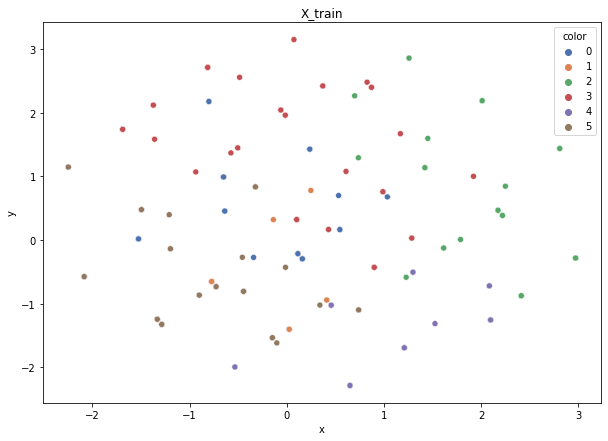

Class cardinalities: Counter({3: 87, 5: 79, 0: 78, 2: 75, 4: 41, 1: 40})
Weights: {0: 0.12859532399632337, 2: 0.1337391369561763, 3: 0.11529235944497956, 4: 0.24464476272471275, 5: 0.1269675350849775, 1: 0.25076088179283057}
Training autoencoder...


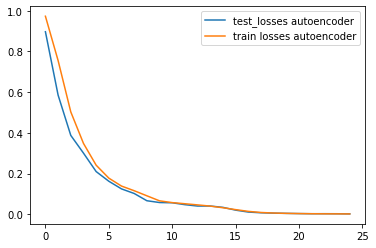

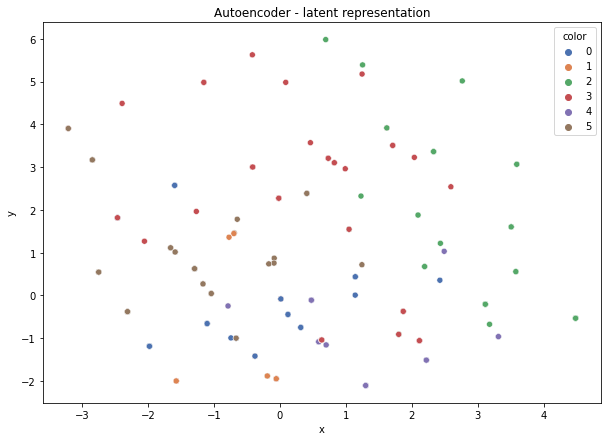

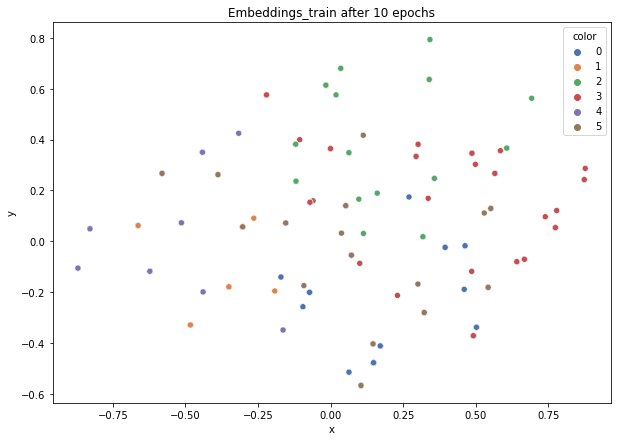

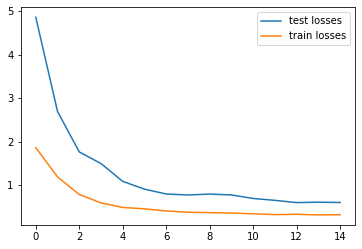

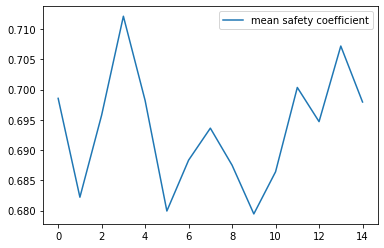

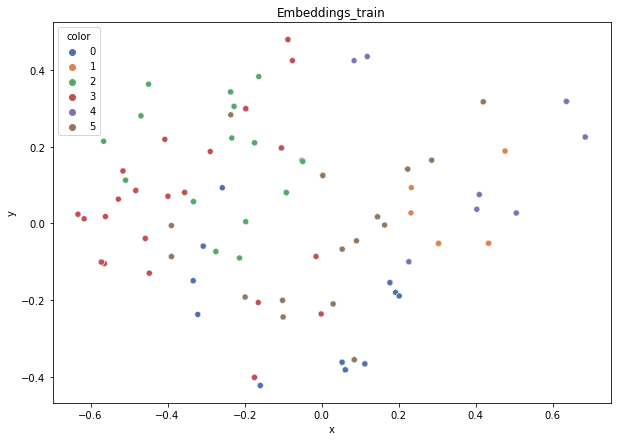

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn

DT-f1-new-features: 0.771
DT-f1-old+new-features: 0.778
DT-f1-old-features: 0.789
DT-gmean-new-features: 0.769
DT-gmean-old+new-features: 0.779
DT-gmean-old-features: 0.797
DT-minority_gmean-new-features: 0.013
DT-minority_gmean-old+new-features: 0.014
DT-minority_gmean-old-features: 0.014
KNN-f1-new-features: 0.585
KNN-f1-old+new-features: 0.749
KNN-f1-old-features: 0.741
KNN-gmean-new-features: 0.222
KNN-gmean-old+new-features: 0.726
KNN-gmean-old-features: 0.719
KNN-minority_gmean-new-features: 0.004
KNN-minority_gmean-old+new-features: 0.008
KNN-minority_gmean-old-features: 0.008


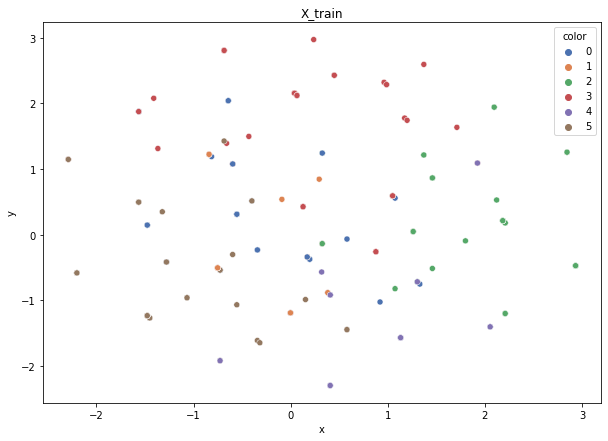

Class cardinalities: Counter({3: 87, 5: 80, 0: 78, 2: 75, 4: 41, 1: 39})
Weights: {0: 0.1279755802357915, 2: 0.13309460344522317, 3: 0.114736727107951, 4: 0.2434657380095546, 5: 0.12477619072989674, 1: 0.255951160471583}
Training autoencoder...


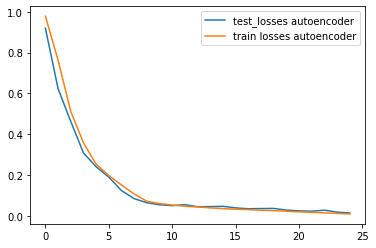

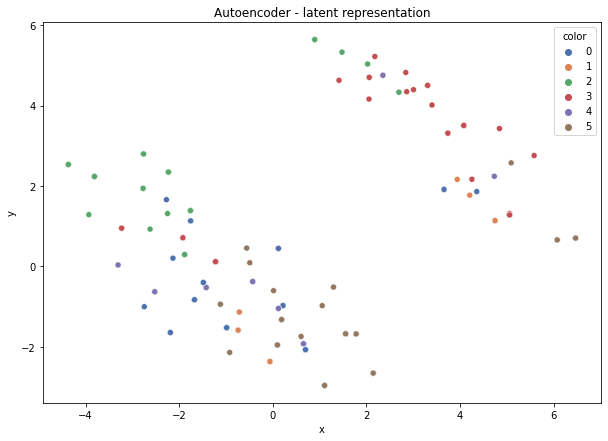

In [ ]:
result_dict = defaultdict(list)

std_dict = defaultdict(list)

safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    safety_dict["dataset"].append(dataset_name)
    fold_safety_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']

    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)

    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[2:3]

    for train_index, test_index in folds:
#         try:
        X_train, X_test = X[train_index], X[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)
        y_train, y_test = y[train_index], y[test_index]


        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)


        # PCA X_train
        pca = PCA(n_components=2)
        pca.fit(X_train_enc)
        plot_embeddings(pca.transform(X_train_enc), y_train)
        plt.title("X_train")
        plt.show()

        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        autoenc_cfg = autoencoder_config[dataset_name]
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg, pca, autoenc_cfg, k_dict[dataset_name], dataset_name)

        s_dict = calc_safety5(embeddings_test, y_test)
        for k, v in s_dict.items():
            fold_safety_dict[f"emb-{k}"].append(v)

        s_dict = calc_safety5(X_test_enc, y_test)
        for k,v in s_dict.items():
            fold_safety_dict[f"raw-{k}"].append(v)

        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()

        X_train_new = np.hstack([X_train_norm, embeddings_train])
        X_test_new = np.hstack([X_test_norm, embeddings_test])

        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_norm, y_train)
            preds = clf.predict(X_test_norm)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            
            minority_classes = dt_name_minority_classes[dataset_name]
            minority_mask = np.argwhere([label in minority_classes for label in y_test]).ravel()
            gmean_minority = gmean_score(y_test[minority_mask], preds[minority_mask])
            
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            fold_result_dict[f"{clf_name}-minority_gmean-old-features"].append(gmean_minority)


        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            
            minority_classes = dt_name_minority_classes[dataset_name]
            minority_mask = np.argwhere([label in minority_classes for label in y_test]).ravel()
            gmean_minority = gmean_score(y_test[minority_mask], preds[minority_mask])
            
            
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            fold_result_dict[f"{clf_name}-minority_gmean-old+new-features"].append(gmean_minority)
            
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            
            minority_classes = dt_name_minority_classes[dataset_name]
            minority_mask = np.argwhere([label in minority_classes for label in y_test]).ravel()
            gmean_minority = gmean_score(y_test[minority_mask], preds[minority_mask])
            
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
            fold_result_dict[f"{clf_name}-minority_gmean-new-features"].append(gmean_minority)
            
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")

    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
    for k in fold_result_dict:
        std_dict[f"{k}-std"].append(np.std(fold_result_dict[k], ddof=1))

    for k in fold_safety_dict:
        safety_dict[k].append(np.sum(fold_safety_dict[k]) / X.shape[0])

In [ ]:
results_df = pd.DataFrame.from_dict(result_dict)

In [ ]:
std_df = pd.DataFrame.from_dict(std_dict)

In [ ]:
safety_df = pd.DataFrame.from_dict(safety_dict)

In [ ]:
results_df

In [ ]:
safety_df[sorted(safety_df.filter(regex=("dataset|emb")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
safety_df[sorted(safety_df.filter(regex=("dataset|raw")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
safety_df[sorted(safety_df.filter(regex=("dataset|.*safe")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
from IPython.display import display
for clf in instantiate_classifiers().keys():
    print(clf)
    display(results_df.filter(regex=(f"dataset|{clf}-f1*")).style.highlight_max(color = 'lightgreen', axis = 1))
    display(results_df.filter(regex=(f"dataset|{clf}-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1))
    display(results_df.filter(regex=(f"dataset|{clf}-minority_gmean*")).style.highlight_max(color = 'lightgreen', axis = 1))

In [ ]:
for clf in instantiate_classifiers().keys():
    print(clf)
    display(std_df.filter(regex=(f"dataset|{clf}-f1*")))
    display(std_df.filter(regex=(f"dataset|{clf}-gmean*")))
    display(std_df.filter(regex=(f"dataset|{clf}-minority_gmean*")))